In [8]:
# Charger les bibliothèques nécessaires
install.packages("forecast")
library(forecast)
library(tseries)
library(ggplot2)


Warning message:
"package 'forecast' is in use and will not be installed"


In [20]:

# 1. Charger les données et les visualiser
data("AirPassengers")
ts_data <- AirPassengers


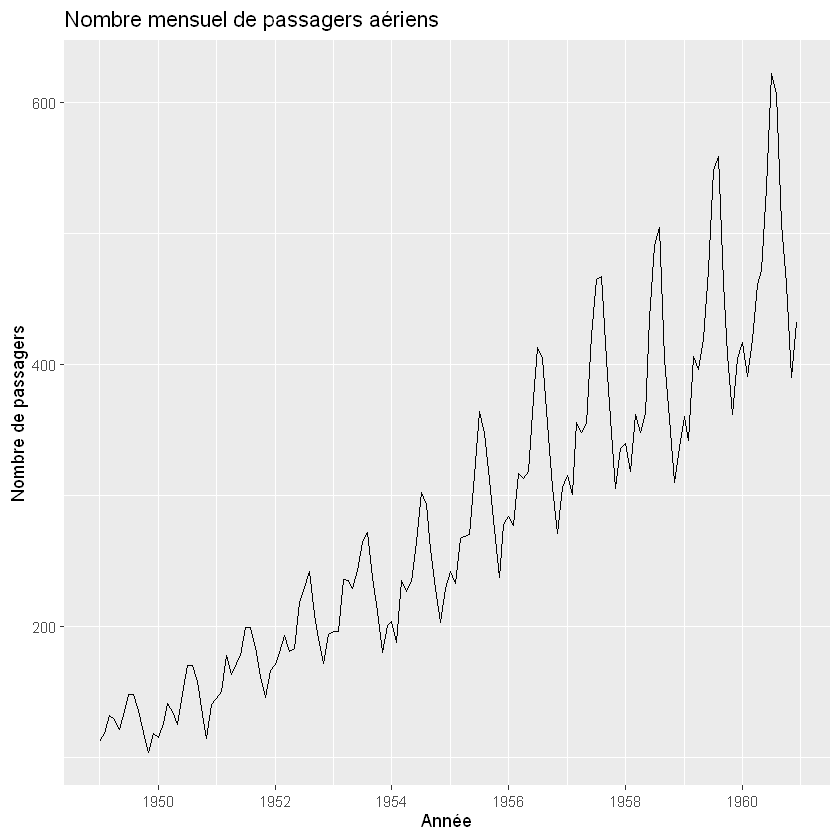

In [10]:

# Visualiser la série temporelle
autoplot(ts_data) + 
  ggtitle("Nombre mensuel de passagers aériens") +
  xlab("Année") + ylab("Nombre de passagers")

In [11]:

# 2. Vérifier la stationnarité avec le test ADF
adf_test <- adf.test(ts_data)
print(adf_test)  # Si p-value > 0.05, la série est non stationnaire

Warning message in adf.test(ts_data):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



In [12]:

# 3. Différencier la série pour la rendre stationnaire
ts_data_diff <- diff(ts_data, differences = 1)  # Différenciation d'ordre 1
adf_test_diff <- adf.test(ts_data_diff)
print(adf_test_diff)  # Vérifier si la série différenciée est stationnaire

Warning message in adf.test(ts_data_diff):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ts_data_diff
Dickey-Fuller = -7.0177, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



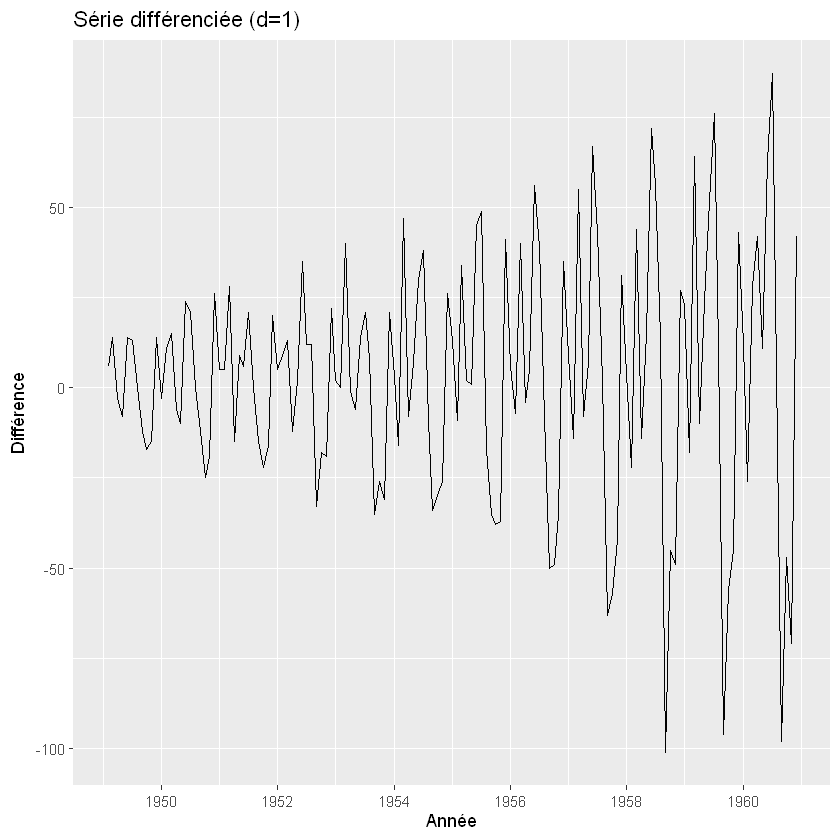

In [13]:

# Visualiser la série différenciée
autoplot(ts_data_diff) + 
  ggtitle("Série différenciée (d=1)") +
  xlab("Année") + ylab("Différence")

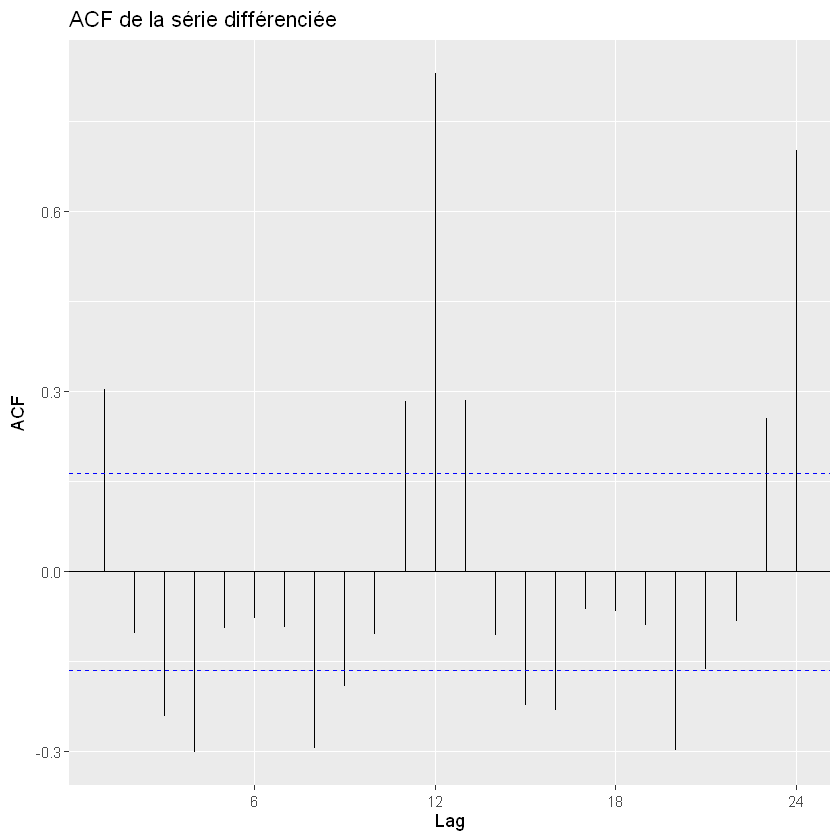

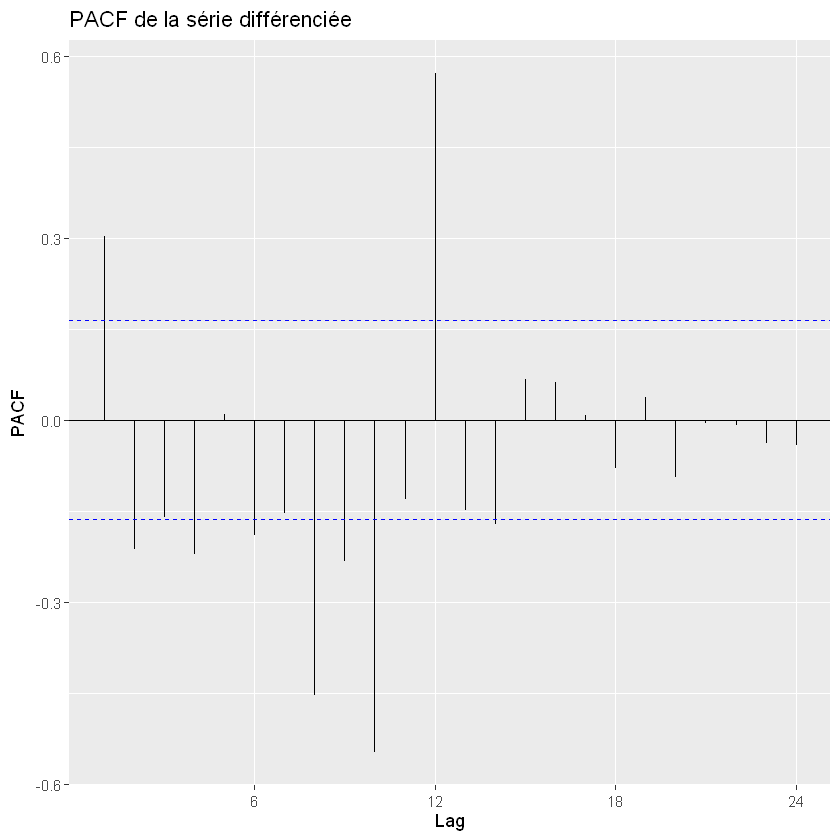

In [18]:
# 4. Identifier les ordres AR et MA avec ACF et PACF
acf_plot <- ggAcf(ts_data_diff) + ggtitle("ACF de la série différenciée") + theme(plot.background = element_rect(fill = "white"))
pacf_plot <- ggPacf(ts_data_diff) + ggtitle("PACF de la série différenciée") + theme(plot.background = element_rect(fill = "white"))

print(acf_plot)
print(pacf_plot)

In [15]:

# 5. Ajuster le modèle ARIMA
# Remarque : Si vous ne connaissez pas les ordres, utilisez auto.arima pour les déterminer automatiquement
arima_model <- auto.arima(ts_data, seasonal = TRUE)
summary(arima_model)

Series: ts_data 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

Training set error measures:
                 ME     RMSE     MAE      MPE     MAPE     MASE        ACF1
Training set 1.3423 10.84619 7.86754 0.420698 2.800458 0.245628 -0.00124847

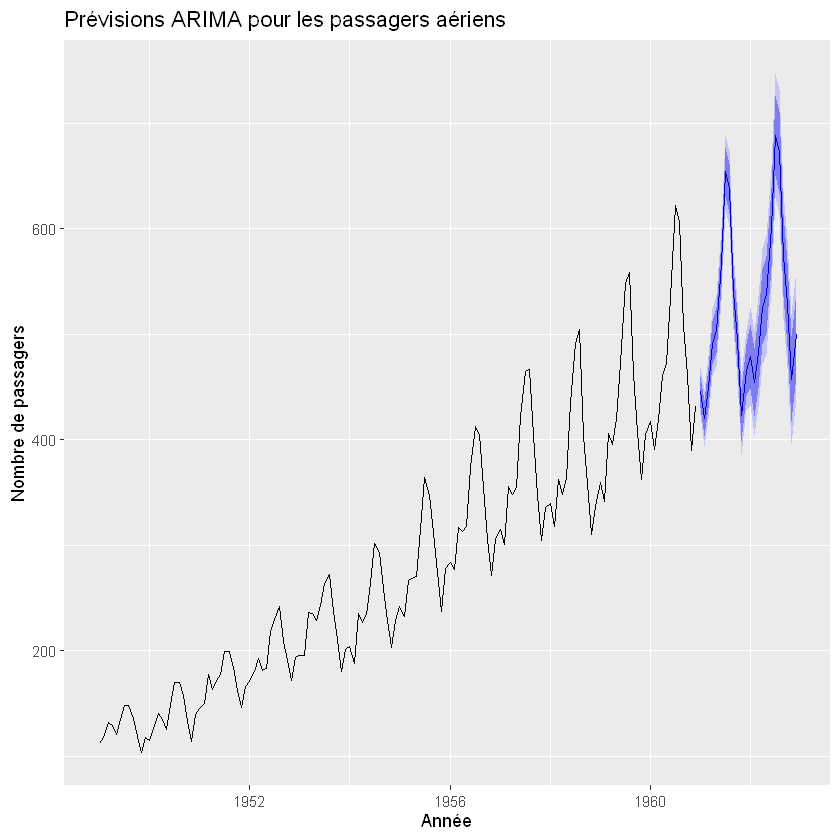

In [16]:

# 6. Faire des prévisions
forecast_result <- forecast(arima_model, h = 24)  # Prévoir 24 mois (2 ans)
autoplot(forecast_result) + 
  ggtitle("Prévisions ARIMA pour les passagers aériens") +
  xlab("Année") + ylab("Nombre de passagers")

In [17]:

# Afficher les valeurs prédites
print(forecast_result)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       445.6349 430.8903 460.3795 423.0851 468.1847
Feb 1961       420.3950 403.0907 437.6993 393.9304 446.8596
Mar 1961       449.1983 429.7726 468.6240 419.4892 478.9074
Apr 1961       491.8399 471.0270 512.6529 460.0092 523.6707
May 1961       503.3945 481.5559 525.2330 469.9953 536.7937
Jun 1961       566.8624 544.2637 589.4612 532.3007 601.4242
Jul 1961       654.2602 631.0820 677.4383 618.8122 689.7081
Aug 1961       638.5975 614.9704 662.2246 602.4630 674.7320
Sep 1961       540.8837 516.9028 564.8647 504.2081 577.5594
Oct 1961       494.1266 469.8624 518.3909 457.0177 531.2356
Nov 1961       423.3327 398.8381 447.8273 385.8715 460.7939
Dec 1961       465.5076 440.8229 490.1923 427.7556 503.2596
Jan 1962       479.2908 448.9986 509.5831 432.9629 525.6188
Feb 1962       454.1768 421.7184 486.6353 404.5359 503.8178
Mar 1962       483.0870 448.7343 517.4396 430.5491 535.6248
Apr 1962       525.8193 490.1122 561.526